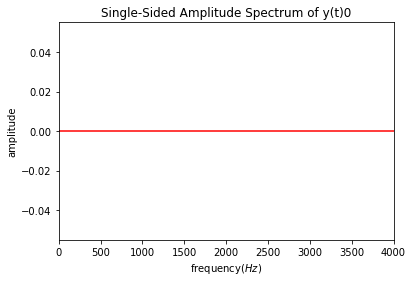

(array([], dtype=int64),)


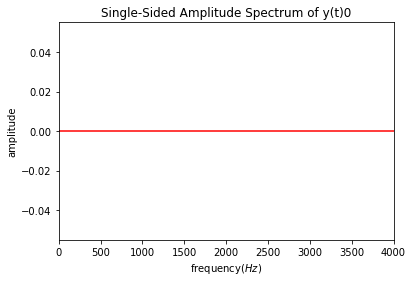

(array([], dtype=int64),)


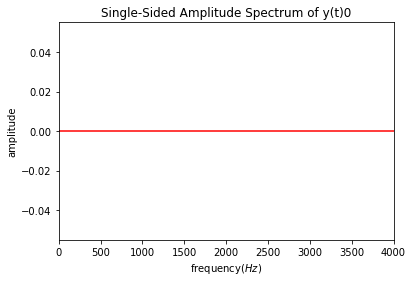

(array([], dtype=int64),)


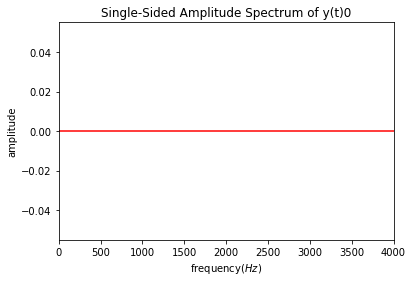

(array([], dtype=int64),)


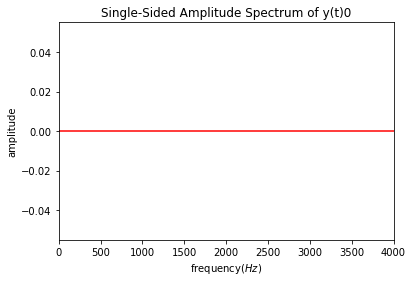

(array([], dtype=int64),)


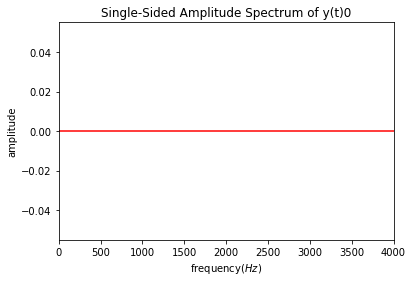

(array([], dtype=int64),)


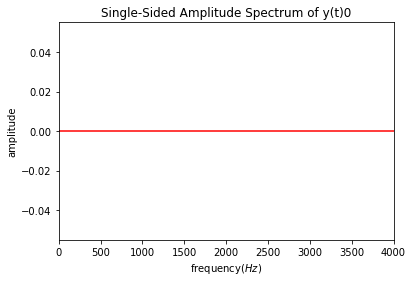

(array([], dtype=int64),)


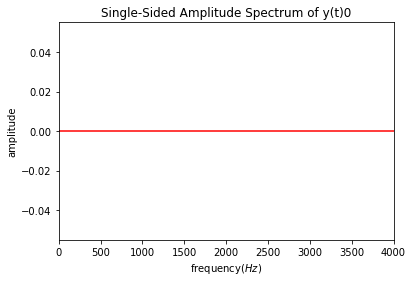

(array([], dtype=int64),)


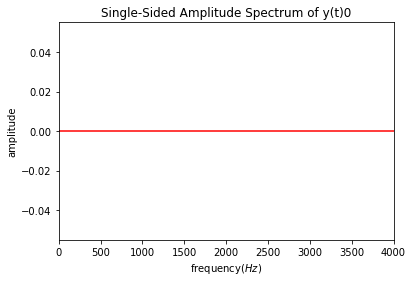

(array([], dtype=int64),)


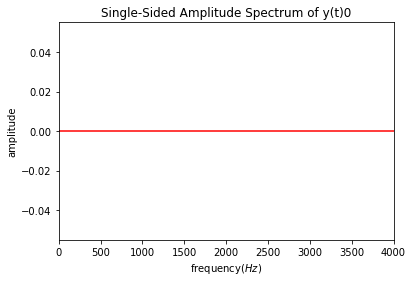

(array([], dtype=int64),)


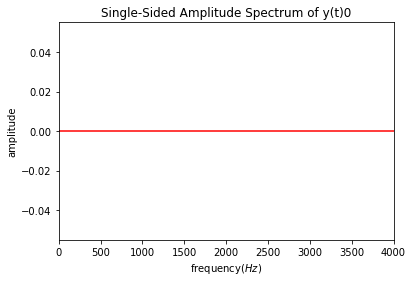

(array([], dtype=int64),)


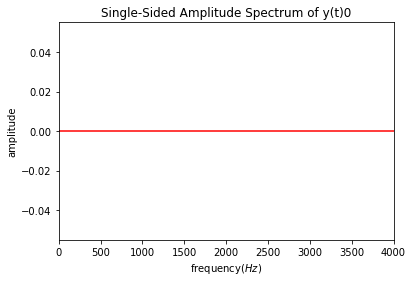

(array([], dtype=int64),)


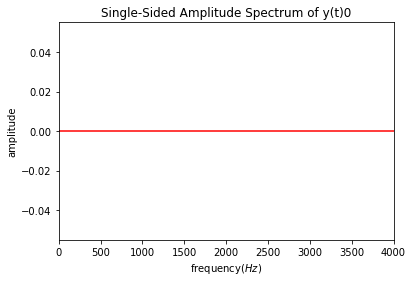

(array([], dtype=int64),)


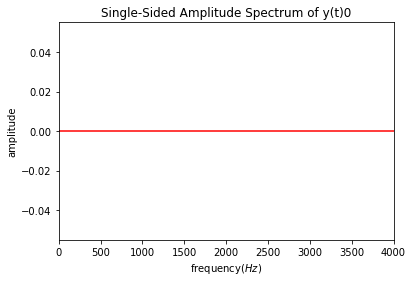

(array([], dtype=int64),)


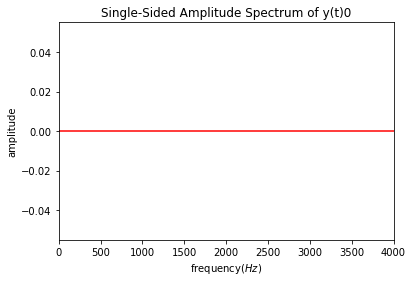

(array([], dtype=int64),)


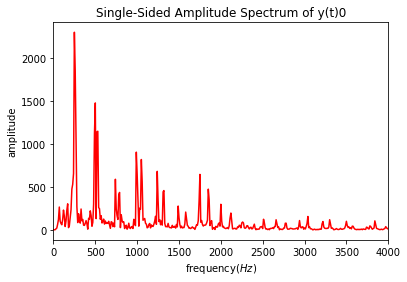

(array([25, 26]),)


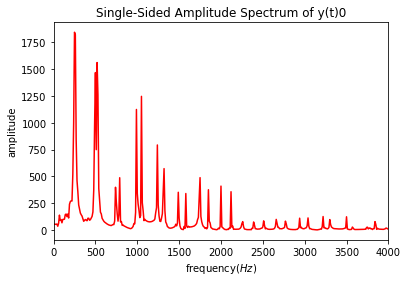

(array([25, 26, 50, 52]),)


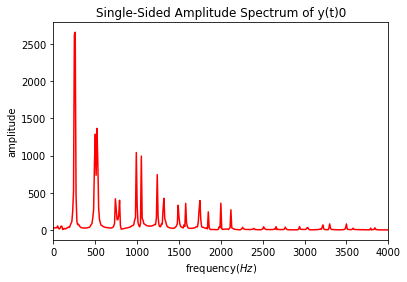

(array([25, 26]),)


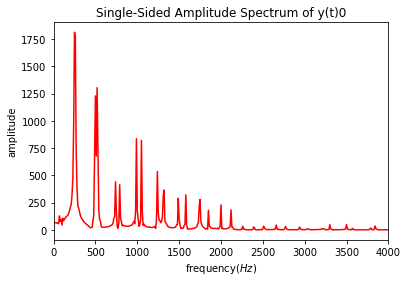

(array([25, 26]),)


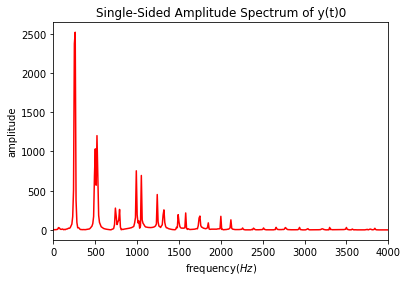

(array([25, 26]),)


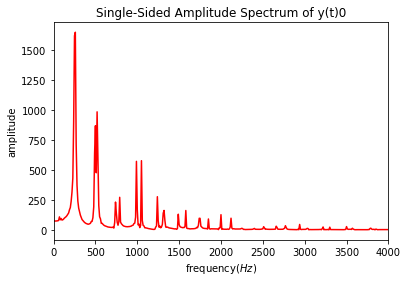

(array([25, 26]),)


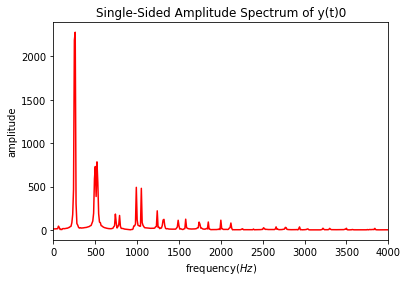

(array([25, 26]),)


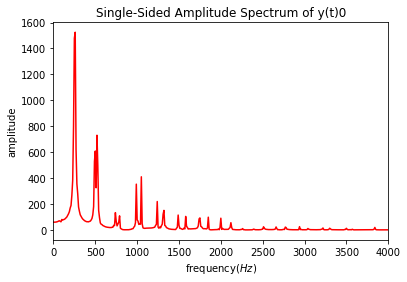

(array([25, 26]),)


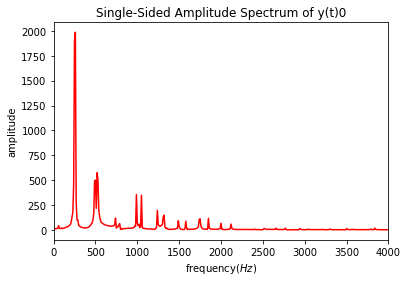

(array([25, 26]),)


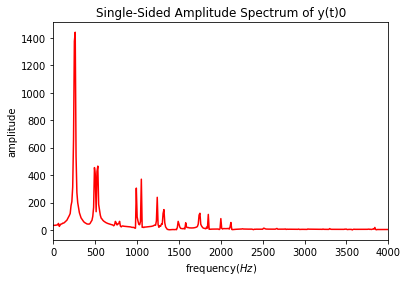

(array([25, 26]),)


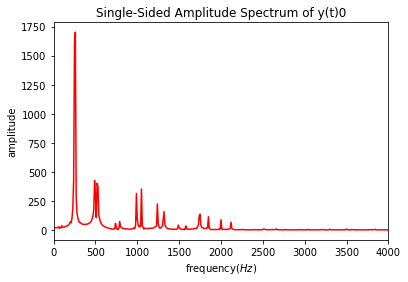

(array([25, 26]),)


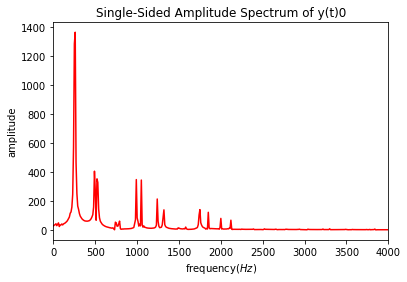

(array([25, 26]),)


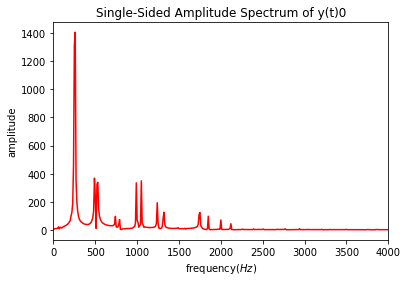

(array([25, 26]),)


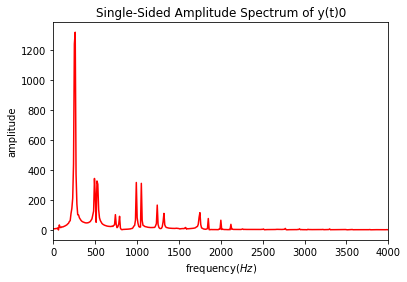

(array([25, 26]),)


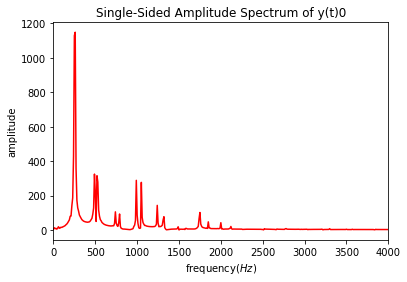

(array([25, 26]),)


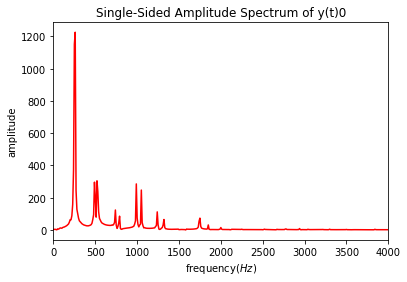

(array([25, 26]),)


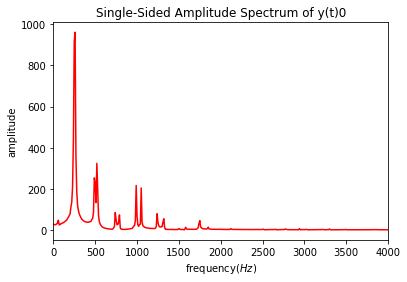

(array([25, 26]),)


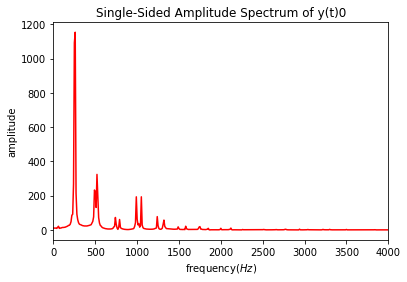

(array([25, 26]),)


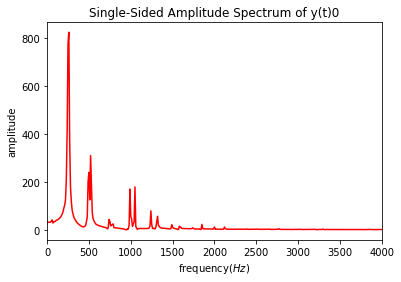

(array([25, 26]),)


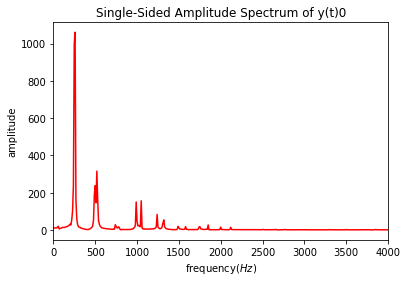

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
from operator import eq
fs, data = wavfile.read('B2+C3.wav') # load the data
y = data.T[0] # this is a two channel soundtrack, I get the first track

blockSize = int(fs / 10)
blockHall = int(len(y) / blockSize)

ans = []

for i in range(0, blockHall):
    part = y[blockSize * i: blockSize * (i+1)]
    n=len(part)        # Length of signal
    NFFT=n      # ?? NFFT=2^nextpow2(length(y))  ??
    k=np.arange(NFFT)

    f0=k*fs/NFFT    # double sides frequency range
    f0=f0[range(int(NFFT/2))]

    Y=np.fft.fft(part)/NFFT        # fft computing and normaliation
    Y=Y[range(int(NFFT/2))]          # single sied frequency range

    amplitude_Hz = 2*abs(Y)
    phase_ang = np.angle(Y)*180/np.pi

    bank = np.where((amplitude_Hz >= (amplitude_Hz.max() * 0.75)) & (amplitude_Hz > 400))

    result = '침묵'

    check = 0
    
    if (len(bank[0]) > 1):
        '''
            noteName = ['도', '레', '미', '파', '솔', '라', '시']

            check = f0[bank[0][0]]

            if (check > 127 and check <= 131):
                result = noteName[0]
            elif (check > 131 and check <= 147):
                result = noteName[1]
            elif (check > 147 and check <= 165):
                result = noteName[2]
            elif (check > 165 and check <= 175):
                result = noteName[3]
            elif (check > 175 and check <= 196):
                result = noteName[4]
            elif (check > 196 and check <= 220):
                result = noteName[5]
            elif (check > 220 and check <= 247):
                result = noteName[6]

        '''
    
    plt.plot(f0,amplitude_Hz,'r')
    plt.title('Single-Sided Amplitude Spectrum of y(t)' + str(check))
    plt.xlabel('frequency($Hz$)')
    plt.ylabel('amplitude')
    plt.xlim(0,4000)
    plt.show()
    print(bank)
    
    ans.insert(i, result)

noteBank = ans[0]
sameBank = 0

for i in range(1, blockHall):
    if (eq(ans[i], noteBank)):
        sameBank += 1
    else:
        noteBank = ans[i]

        if (sameBank < 1):
            ans[i - 1] = noteBank

        sameBank = 0
    
    ans[i - 1] = ans[i - 1]
    
ans
